# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

# Exercise 01.1 (C++)

We want to test the random numbers generator provided. We do this by sampling a uniform distribution in \[0,1). We check if the first moment $\mu$ (mean) and the second central moment $\sigma^2$ (variance), calculated using our random numbers generator, approach to their expected values $\mu_{true}=1/2$, $\sigma^2_{true}=1/12$, within the statistical errors.

1)To obtain an estimate of the distribution's mean we know we can use the sample mean as an estimator, $\hat{x}=\frac{1}{N}\sum_ix_i$. The uncertainties will be given by the standard deviation of the mean. To obtain an estimate of the errors we use the blocking method.

2)To obtain an estimate of distribution's variance, we can use the following estimator, $\frac{1}{N}\sum_i(x_i-\mu)^2$ which is not biased since the population mean is know. The computation of the uncertainties in the calculation is carried out again with the blocking method.

Data blocking allows us to have an unbiased estimate of the statiscal errors, for a given statistics of interest, even when the statistic is calculated sampling random variables not completely uncorrelated. Data blocking works provided that the block length is choosen wisely, as we explain in the later part of the notebook where the blocking method was presented. In this exercisation the correlation between the sampled random numbers should be negligible, though we use data blocking to get used to it, as it will become more relevant later on. 


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
path="DATA/"

In [4]:
M=1000000
N=100
L=int(M/N)
x = np.arange(N)
x*=L

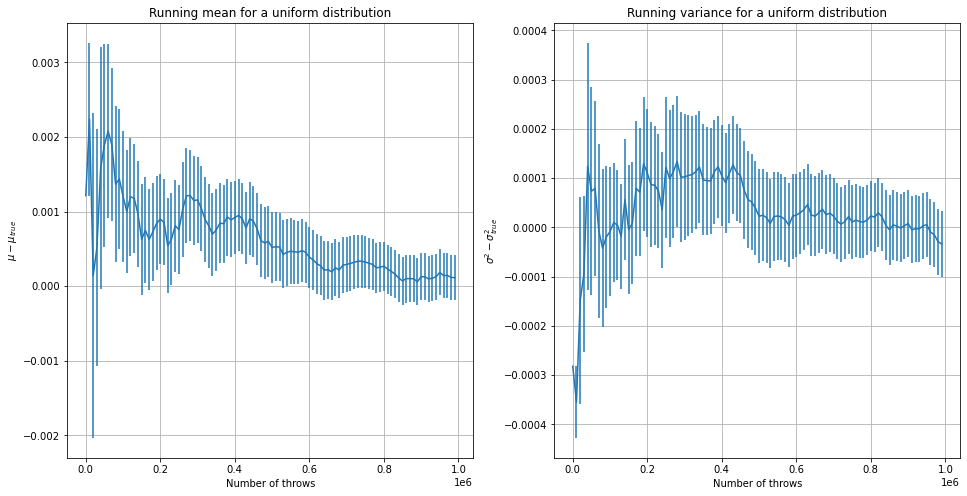

In [5]:
filename = 'averages.txt'
data = np.loadtxt(path+filename, delimiter='\t', skiprows=1, dtype=float)
averages=data[:,0]
errors=data[:,1]

filename2 = 'averages2.txt'
data2 = np.loadtxt(path+filename2, delimiter='\t', skiprows=1, dtype=float)
averages2=data2[:,0]
errors2=data2[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.errorbar(x,averages-0.5,yerr=errors)
ax1.set_xlabel('Number of throws')
ax1.set_ylabel(r'$\mu-\mu_{true}$')
ax1.set_title("Running mean for a uniform distribution")
ax1.grid(True)

ax2.errorbar(x,averages2-1/12,yerr=errors2)
ax2.set_xlabel('Number of throws')
ax2.set_ylabel(r'$\sigma^2 -\sigma^2_{true}$')
ax2.set_title("Running variance for a uniform distribution")
ax2.grid(True)


We can see that the moments estimated using the random generator approach their expected value within the errors.

## $\chi^2  \text{test}$ 

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

mean $\chi^2$ value : 99.11194 0.43319503348538063


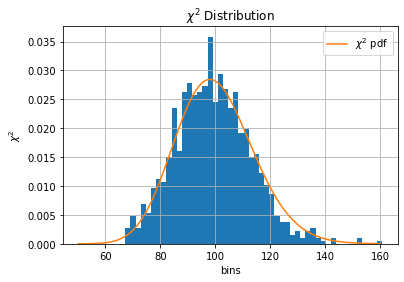

In [6]:
import scipy
from scipy.stats import chi2

chiquad = np.loadtxt(path + 'chiquad.txt', delimiter='\t', dtype=float)

plt.hist(chiquad,bins=50, density=True)
plt.xlabel('bins')   
plt.ylabel(r'$\chi^2$')
plt.title(r'$\chi^2$ Distribution')
plt.grid()

X = np.arange(50, 160, 0.1)

plt.plot(X, chi2.pdf(X,df=100), label=r"$\chi^2$ pdf") 
plt.legend()
print(r"mean $\chi^2$ value :", np.mean(chiquad), np.std(chiquad)/len(chiquad)**(0.5))

As we can see ours $\chi^2$ obtained by the sample data follow the correct distribution, which is peaked around the correct expectation value 100. A single instance of a $\chi$ value above or under 100 doesn't mean we have a bad generator, since it could just be a fluctuation. The confrontation with the expected $\chi^2$ distribution shows that the random generator provided works properly.

# Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

## CLT

We want to test the central limit theorem and its generalizations, i.e. the existence of others attractors aside from the Gaussian distribution. We plot the distribution of partial sums $S_N$ with $N=1,2,10,100$, for random variables sampled by a uniform, exponential and Cauchy distribuion.

In [7]:
def plot_saw(ax, SN, dist, N, nbin, xmin,xmax) :  
    ax.hist(SN, bins=nbin, range=(xmin,xmax))
    ax.set_xlabel(f"S{N}")
    ax.set_ylabel(f"S{N} per bin")
    ax.set_title(f"$S_N$ for a {dist} distribution with N={N}");

40000
40000
40000


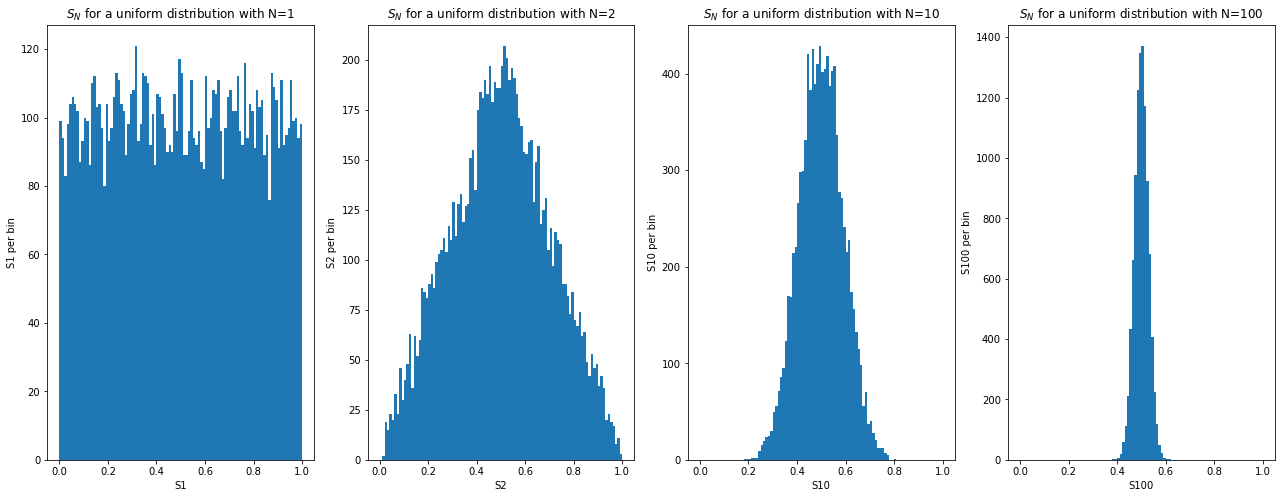

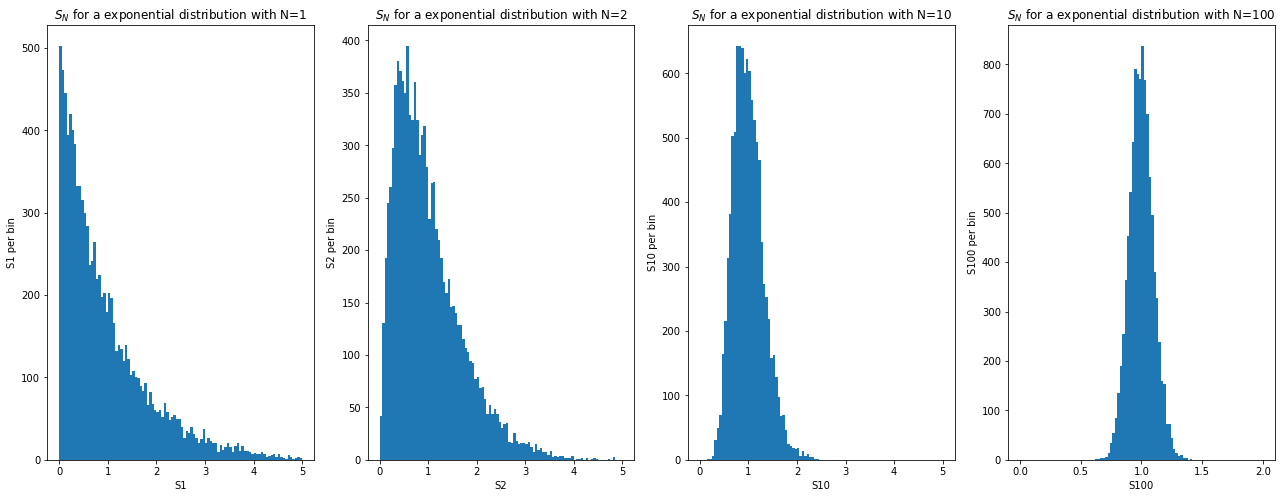

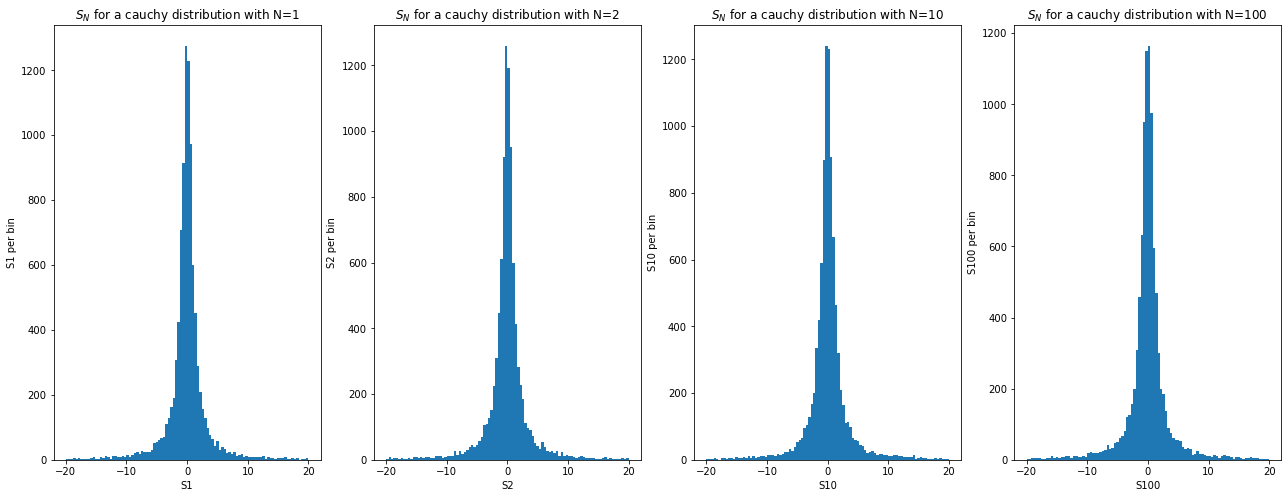

In [8]:
filename1="randu.txt"
filename2="exponential.txt"
filename3="cauchy.txt"

uniformSN = np.loadtxt(path+filename1, skiprows=1, dtype=float)
Nthrows=10000;
print(len(uniformSN))
uniformS1=uniformSN[:Nthrows]
uniformS2=uniformSN[Nthrows:2*Nthrows]
uniformS10=uniformSN[2*Nthrows:3*Nthrows]
uniformS100=uniformSN[3*Nthrows:4*Nthrows]

xmin=0;
xmax=1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 8))
plot_saw(ax1,uniformS1,  "uniform", 1 ,100, xmin,xmax)
plot_saw(ax2,uniformS2,  "uniform", 2 ,100, xmin,xmax)
plot_saw(ax3,uniformS10,  "uniform", 10,100 , xmin,xmax)
plot_saw(ax4,uniformS100,  "uniform", 100,100 , xmin,xmax)


expSN = np.loadtxt(path+filename2, skiprows=1, dtype=float)
Nthrows=10000
print(len(uniformSN))
expS1=expSN[:Nthrows]
expS2=expSN[Nthrows:2*Nthrows]
expS10=expSN[2*Nthrows:3*Nthrows]
expS100=expSN[3*Nthrows:4*Nthrows]

xmin=0
xmax=5
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 8))
plot_saw(ax1,expS1,  "exponential", 1 ,100, xmin,xmax)
plot_saw(ax2,expS2,  "exponential", 2 ,100, xmin,xmax)
plot_saw(ax3,expS10,  "exponential", 10,100 , xmin,xmax)
plot_saw(ax4,expS100,  "exponential", 100,100 ,xmin,xmax-3)

cauchySN = np.loadtxt(path+filename3, skiprows=1, dtype=float)
Nthrows=10000;
print(len(uniformSN))
cauchyS1=cauchySN[:Nthrows]
cauchyS2=cauchySN[Nthrows:2*Nthrows]
cauchyS10=cauchySN[2*Nthrows:3*Nthrows]
cauchyS100=cauchySN[3*Nthrows:4*Nthrows]

xmin=-20
xmax=20
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 8))
plot_saw(ax1,cauchyS1,  "cauchy", 1 ,100, xmin,xmax)
plot_saw(ax2,cauchyS2,  "cauchy", 2 ,100, xmin,xmax)
plot_saw(ax3,cauchyS10, "cauchy", 10,100 ,xmin,xmax)
plot_saw(ax4,cauchyS100,"cauchy", 100,100,xmin,xmax)

As we can see the uniform and exponential distribution approach to a normal distribution . While the Cauchy remain a Cauchy distribution, (in the next cells there are the fits). The standart CLT concerns pdfs with finite first and second moments, but the Cauchy distribution's second moment is infinite, therefore the standard CLT doesn't apply.

But in general aside the Gaussian distribution there are other attractors in the pdf space, the Cauchy distribution being an example. In fact a pdf to be an attractor needs to be invariant under convolution, i.e. a stable pdf.
The distribution of the sum $S_N$ of $N$ indipendent random variables is the convolution of the random variables' distributions. So in these plots we are actually seeing how the starting pdf behaves under convolution. Uniform and exponential distributions aren't invariant, they approach to the normal distribution being their attractor. While the Cauchy one is invariant. Hence as said before the Cauchy distribution is another possible attractor.



Text(0.5, 1.0, 'Fitting cauchy $S_N$ with N=100 with a cauchy-lorentzian distribution')

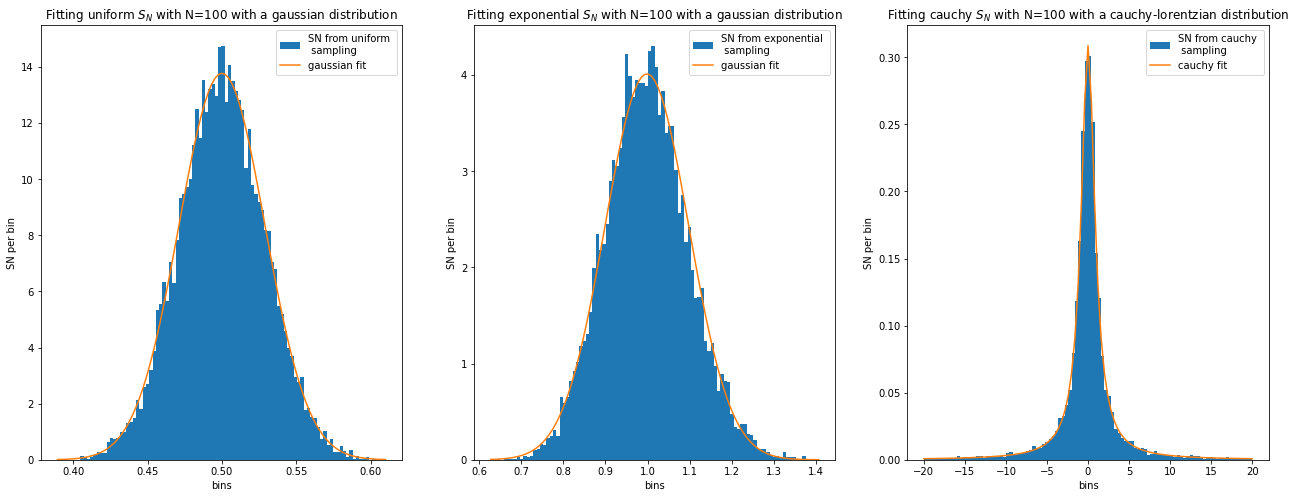

In [9]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 8))

_, bins, _ = ax1.hist(uniformS100, 100, density=True,label="SN from uniform \n sampling")
mu, sigma = scipy.stats.norm.fit(uniformS100)
normal_fit = scipy.stats.norm.pdf(bins, mu, sigma)
ax1.plot(bins, normal_fit, label="gaussian fit")
ax1.set_xlabel('bins')
ax1.set_ylabel('SN per bin')
ax1.legend()
ax1.set_title(r'Fitting uniform $S_N$ with N=100 with a gaussian distribution')

_, bins2, _ = ax2.hist(expS100, 100, density=True, label="SN from exponential \n sampling")
mu, sigma = scipy.stats.norm.fit(expS100)
normal_fit = scipy.stats.norm.pdf(bins2, mu, sigma)
ax2.plot(bins2, normal_fit, label="gaussian fit")
ax2.set_xlabel('bins')
ax2.set_ylabel('SN per bin')
ax2.legend()
ax2.set_title(r'Fitting exponential $S_N$ with N=100 with a gaussian distribution')

_, bins3, _ = ax3.hist(cauchyS100, 100, density=True, range=(-20,20), label="SN from cauchy \n sampling")
a,b= scipy.stats.cauchy.fit(cauchyS100)
cauchy_fit = scipy.stats.cauchy.pdf(bins3, a, b)
ax3.plot(bins3, cauchy_fit, label="cauchy fit")
ax3.set_xlabel('bins')
ax3.set_ylabel('SN per bin')
ax3.legend()
ax3.set_title(r'Fitting cauchy $S_N$ with N=100 with a cauchy-lorentzian distribution')

# Exercise 01.3
Simulate the Buffonâ€™s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_t$ times and is observed to land on a line $N_h$ of those times, we can make an estimate of $\pi$ from

$$\pi = \frac{2L}{Pd} = \lim_{N_t \to \infty}\frac{2LN_t}{N_h d}$$

Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of throws $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

In [10]:
N=100
L=100000
x=np.arange(0,N)
x*=L

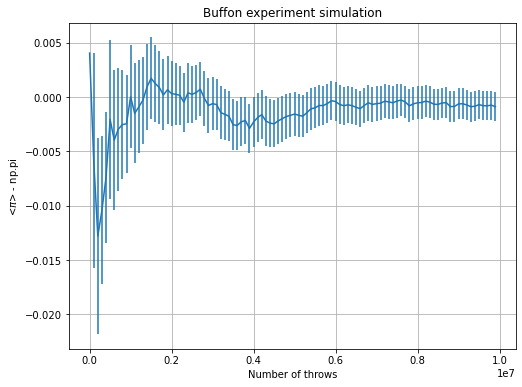

In [11]:
filename = 'Buffon.txt'
pi, pi_err = np.loadtxt(path+filename, unpack=True, dtype=float)

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

ax1.errorbar(x,pi - np.pi,yerr=pi_err)
ax1.set_xlabel('Number of throws')
ax1.set_ylabel(r'<$\pi$> - np.pi')
ax1.set_title("Buffon experiment simulation")
ax1.grid(True)



### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

Choosing the correct value for N is crucial to get unbiased estimates of the errors. A small N will make the data blocking uselesess since the $A_i$ won't be truly uncorrealted. A too large N may not be necessary since there is a saturation point towards the true statistical error, where larger N doesn't change the uncertainties. The length of the blocks should be choosen case by case after having checked how much correlated are the random variables from which we start. In this test of the random generator, it wasn't actually necessary, since the correlation among successive generations of random numbers should be minimal.